# Data Testing and Wrangling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

full = pd.read_csv('athlete_events.csv')

In [2]:
full.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
full.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [4]:
eighteen = full[full['Year'] < 1900].sort_values('Year', ascending=True)
nineteen = full[(full['Year'] > 1899) & (full['Year'] < 2000)].sort_values('Year', ascending=True)
twenty = full[full['Year'] > 1999].sort_values('Year', ascending=True)

print('Ninteenth Century: %s \n' % eighteen['Year'].unique())
print('Twentieth Century: %s \n' % nineteen['Year'].unique())
print('Twenty-First Century: %s \n' % twenty['Year'].unique())

Ninteenth Century: [1896] 

Twentieth Century: [1900 1904 1906 1908 1912 1920 1924 1928 1932 1936 1948 1952 1956 1960
 1964 1968 1972 1976 1980 1984 1988 1992 1994 1996 1998] 

Twenty-First Century: [2000 2002 2004 2006 2008 2010 2012 2014 2016] 



## Distribution of Male/Female Heights and Weights Across the Years

<AxesSubplot:xlabel='Height', ylabel='Weight'>

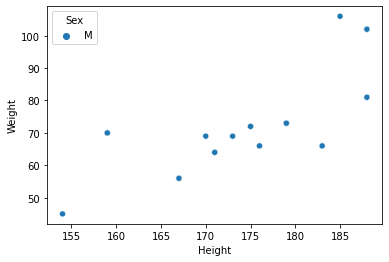

In [5]:
sns.scatterplot(data=eighteen, x='Height', y='Weight', hue='Sex')

<AxesSubplot:xlabel='Height', ylabel='Weight'>

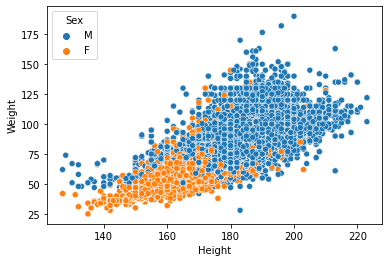

In [6]:
sns.scatterplot(data=nineteen, x='Height', y='Weight', hue='Sex')

<AxesSubplot:xlabel='Height', ylabel='Weight'>

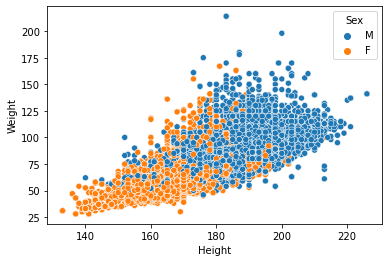

In [7]:
sns.scatterplot(data=twenty, x='Height', y='Weight', hue='Sex')

### More narrow point of view, look instead at a single sport

In [8]:
twenty['Sport'].unique()

array(['Equestrianism', 'Cycling', 'Wrestling', 'Softball', 'Water Polo',
       'Handball', 'Badminton', 'Athletics', 'Boxing', 'Volleyball',
       'Swimming', 'Taekwondo', 'Basketball', 'Rowing', 'Judo',
       'Rhythmic Gymnastics', 'Diving', 'Sailing', 'Football', 'Tennis',
       'Canoeing', 'Baseball', 'Beach Volleyball', 'Hockey', 'Archery',
       'Shooting', 'Weightlifting', 'Triathlon', 'Table Tennis',
       'Gymnastics', 'Fencing', 'Synchronized Swimming',
       'Modern Pentathlon', 'Trampolining', 'Skeleton', 'Ice Hockey',
       'Cross Country Skiing', 'Alpine Skiing', 'Bobsleigh',
       'Figure Skating', 'Biathlon', 'Freestyle Skiing', 'Luge',
       'Speed Skating', 'Curling', 'Short Track Speed Skating',
       'Snowboarding', 'Ski Jumping', 'Nordic Combined', 'Rugby Sevens',
       'Golf'], dtype=object)

<AxesSubplot:xlabel='Height', ylabel='Weight'>

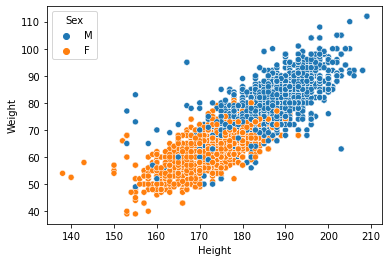

In [9]:
sns.scatterplot(data=twenty[twenty['Sport'] == 'Swimming'], x='Height', y='Weight', hue='Sex')

In [10]:
# sns.scatterplot(data=twenty[twenty['Sport'] == 'Football'], x='Age', y='Weight', hue='Sex')